In [8]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from scipy.spatial.distance import cdist
from ipywidgets import widgets
import cv2

In [30]:
def line(p0,p1,N):
    """get the coordinates of a line connecting points p0 and p1 \nwith N steps, also returns the distance of a step on the line\n
    inputs:
    p0 point (x0,y0)
    p0 point (x1,y1)
    N number of steps (integer)
    returns:
    xcoord,ycoord,step_width"""
    
    xcoord=np.zeros(N)
    ycoord=np.zeros(N)
    xstep=(p1[0]-p0[0])/N
    ystep=(p1[1]-p0[1])/N
    step_width=np.sqrt(xstep**2+ystep**2)
    for i in range(N):
        xcoord[i]=p0[0]+i*xstep
        ycoord[i]=p0[1]+i*ystep
    return xcoord,ycoord,step_width

def line_profile(X,Y,Z,p0,p1,N):
    """Calculates the interpolation of a line connecting p0 and p1 on the surface of 3D-data by using the nearest neighbour"
    inputs:
    X 2D-array m x n , containing row indices
    Y 2D-array m x n , containing column indices
    Z 2D-array m x n , containing the image-data
    p0 point (x0,y0)
    p0 point (x1,y1)
    N number of steps (integer)
    returns:
    profile_x,profile"""    
    
    xcoord,ycoord,step=line(p0,p1,N)
    line_points=list(zip(xcoord,ycoord))
    
    Xflat=np.ravel(X)
    Yflat=np.ravel(Y)
    serialized_coords=list(zip(Xflat,Yflat))
    serialized_image=np.ravel(Z)
    
    distance_matrix=cdist(line_points,serialized_coords)
    closest_point_indices=np.argmin(distance_matrix,axis=-1)
    
    profile=serialized_image[closest_point_indices]
    profile_x=np.arange(len(profile))*step
    
    return profile_x,profile

In [ ]:
line_profile()

In [5]:
img=cv2.imread("example_img.png") #default reads r,g,b
np.shape(img)

(1000, 1000, 3)

(2000, 1000)


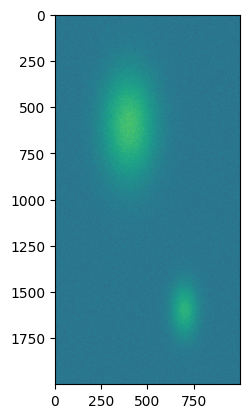

In [12]:
img=cv2.imread("example_img.png",0) # with 0 reads grayscale (total brightness)
print(np.shape(img))
plt.imshow(img)

# Task: Obtain a line profile through both peaks

Hints: 

To get the positions of the peaks, one can perform two 1D-projections by taking a mean over all rows of the image and for the second projection, taking a mean over all columns. (for that the numpy function, np.mean(image,axis=0) can be used with axis=0 or axis=1 ; visualize the 1D-projection with plt.plot() ) 

The pixel-position (index) of a maximum can be obtained by np.argmax(). To also get the second peak position, one can set the region, in which the maximum is searched like that: (shown for random numbers)

In [18]:
test=np.random.randint(low=0,high=100,size=8)
test

array([31, 10, 46, 54, 21, 50, 66, 82])

In [20]:
np.max(test[:4])#maximum of the first 4 numbers

54

In [19]:
np.max(test[4:])#maximum of the remaining numbers

82

In [21]:
# positions of the maxima (notice the index-offset for the second part)
np.argmax(test[:4]),np.argmax(test[4:])

(3, 3)

Having the position (row and column index) of the two peaks, we can create the coordinates of a line with the function line()

However, to use the function line_profile(), we need X and Y (the image-data img corresponds only to Z).
So we can use np.meshgrid() to create the grids X and Y

Spoiler of how to use np.meshgrid():

X,Y=np.meshgrid(np.arange(np.shape(img)[0]),np.arange(np.shape(img)[1]))

Extra: Copy all of your necessary code into one cell and make a function out of it, that could look like:

In [ ]:
def get_2peaks_profile(img,N):
    
    return profile_x,profile

Advanced_Extra: Modify the line_profile_nearest() function, to obtain a linear interpolation between the 3 nearest data-points around each line-point (linear interpolation can be achieved by a weighted average of the 3 nearest points weighted with their inverse distances)

Hint: after getting the closest_point_indices, one can set these positions in the distance-matrix to np.inf, using np.argmin(distance_matrix,axis=-1) again, yields the second_closest_point_indices ...